In [2]:
import os 
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data_paths =  glob('/Users/eunchankim/Desktop/dataset/cifar/train/*.png')

In [6]:
path = data_paths[0]
path

'/Users/eunchankim/Desktop/dataset/cifar/train/32270_deer.png'

In [8]:
gfile =tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [9]:
image.shape

TensorShape([32, 32, 3])

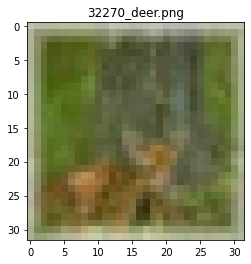

In [11]:
plt.title(os.path.basename(path))
plt.imshow(image)
plt.show()

# tf.data

In [14]:
data_paths[:10]

['/Users/eunchankim/Desktop/dataset/cifar/train/32270_deer.png',
 '/Users/eunchankim/Desktop/dataset/cifar/train/21851_cat.png',
 '/Users/eunchankim/Desktop/dataset/cifar/train/48309_deer.png',
 '/Users/eunchankim/Desktop/dataset/cifar/train/33547_truck.png',
 '/Users/eunchankim/Desktop/dataset/cifar/train/45202_automobile.png',
 '/Users/eunchankim/Desktop/dataset/cifar/train/2789_bird.png',
 '/Users/eunchankim/Desktop/dataset/cifar/train/24517_horse.png',
 '/Users/eunchankim/Desktop/dataset/cifar/train/15193_frog.png',
 '/Users/eunchankim/Desktop/dataset/cifar/train/10817_ship.png',
 '/Users/eunchankim/Desktop/dataset/cifar/train/49897_ship.png']

In [12]:
def read_image(path):
    gfile =tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image

In [16]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)

In [22]:
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([32, 32, 3])

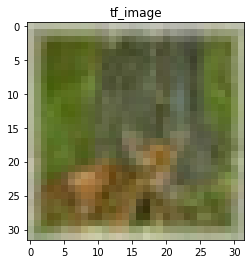

In [33]:
plt.title('tf_image')
plt.imshow(tf_image)
plt.show()

In [34]:
tf.image = next(iter(dataset))

In [35]:
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([8, 32, 32, 3])

## Batch로 묶기

In [36]:
batch_size = 8

In [37]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)

In [27]:
tf_images = next(iter(dataset))
tf_images.shape

TensorShape([8, 32, 32, 3])

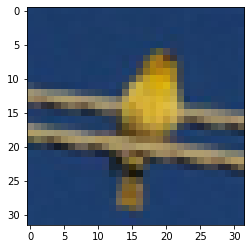

In [28]:
plt.imshow(tf_images[5])
plt.show()

## Shuffle 하기

In [30]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)
dataset = dataset.shuffle(buffer_size=len(data_paths)) # 공홈에는 data 길이만큼 넣어줌 ..

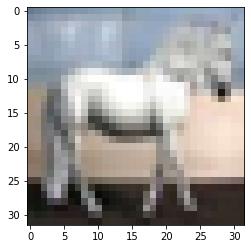

In [32]:
tf_images = next(iter(dataset))

plt.imshow(tf_images[0])
plt.show()

## Label하고 같이 넣기 

In [41]:
class_name = path.split('_')[-1].replace('.png','')

In [42]:
def get_label(path):
    return path.split('_')[-1].replace('.png','')

In [43]:
path, get_label(path)

('/Users/eunchankim/Desktop/dataset/cifar/train/32270_deer.png', 'deer')

In [44]:
label_names = [get_label(path) for path in data_paths]

In [45]:
label_names[:10]

['deer',
 'cat',
 'deer',
 'truck',
 'automobile',
 'bird',
 'horse',
 'frog',
 'ship',
 'ship']

In [50]:
class_names = np.unique(label_names)
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [51]:
onehot_encoding = np.array('frog' == class_names, np.uint8)
onehot_encoding

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [52]:
# 라벨 가져오기
def get_label(path):
    return path.split('_')[-1].replace('.png','')

In [53]:
# onehot
def onehot_encoding(label):
    return np.array(label == class_names, np.uint8)

In [55]:
data_paths[:10], label_names[:10]

(['/Users/eunchankim/Desktop/dataset/cifar/train/32270_deer.png',
  '/Users/eunchankim/Desktop/dataset/cifar/train/21851_cat.png',
  '/Users/eunchankim/Desktop/dataset/cifar/train/48309_deer.png',
  '/Users/eunchankim/Desktop/dataset/cifar/train/33547_truck.png',
  '/Users/eunchankim/Desktop/dataset/cifar/train/45202_automobile.png',
  '/Users/eunchankim/Desktop/dataset/cifar/train/2789_bird.png',
  '/Users/eunchankim/Desktop/dataset/cifar/train/24517_horse.png',
  '/Users/eunchankim/Desktop/dataset/cifar/train/15193_frog.png',
  '/Users/eunchankim/Desktop/dataset/cifar/train/10817_ship.png',
  '/Users/eunchankim/Desktop/dataset/cifar/train/49897_ship.png'],
 ['deer',
  'cat',
  'deer',
  'truck',
  'automobile',
  'bird',
  'horse',
  'frog',
  'ship',
  'ship'])

In [54]:
dataset = tf.data.Dataset.from_tensor_slices((data_paths, label_names))

In [56]:
def read_image_label(path, label):
    gfile =tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image, label

In [62]:
dataset = tf.data.Dataset.from_tensor_slices((data_paths, label_names))
dataset = dataset.map(read_image_label)
dataset = dataset.batch(batch_size)
dataset = dataset.shuffle(buffer_size=len(data_paths))
dataset = dataset.repeat()

In [63]:
image, label = next(iter(dataset))

In [66]:
image.shape, label.shape

(TensorShape([8, 32, 32, 3]), TensorShape([8]))

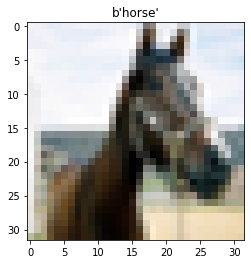

In [71]:
plt.imshow(image[0])
plt.title(np.array(label[0]))
plt.show()

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((data_paths, label_names))
dataset = dataset.map(read_image_label)
dataset = dataset.batch(batch_size)
dataset = dataset.shuffle(buffer_size=len(data_paths))
dataset = dataset.repeat()